### Goal

https://github.com/rposhala/Recommender-System-on-MovieLens-dataset?tab=readme-ov-file

The goal of this notebook is to build a simple recommendation model

### Data Import

In [52]:
import pandas as pd
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv('dataset/ml-100k/u.data', delim_whitespace=True, names=["user id","item id","rating","timestamp"])

/var/folders/5w/0rbr_3m55zvcks3pv8gm43s40000gn/T/ipykernel_8037/283411475.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('dataset/ml-100k/u.data', delim_whitespace=True, names=["user id","item id","rating","timestamp"])


In [54]:
df = df.drop(['timestamp'], axis=1)

In [55]:
df.head()

,user id,item id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [56]:
df.shape

(100000, 3)

In [57]:
df.dtypes

user id    int64
item id    int64
rating     int64
dtype: object

In [58]:
df.describe()

,user id,item id,rating
count,100000.00000,100000.000000,100000.000000
mean,462.48475,425.530130,3.529860
std,266.61442,330.798356,1.125674
min,1.00000,1.000000,1.000000
25%,254.00000,175.000000,3.000000
50%,447.00000,322.000000,4.000000
75%,682.00000,631.000000,4.000000
max,943.00000,1682.000000,5.000000


### EDA

In [59]:
"""
plt.hist(x=df['rating'], bins=range(1,7), align='left', edgecolor='white')
plt.xlabel('Average Rating')
plt.ylabel('Number of User Ratings')
plt.title('Histogram of Ratings')
plt.show()
"""

"\nplt.hist(x=df['rating'], bins=range(1,7), align='left', edgecolor='white')\nplt.xlabel('Average Rating')\nplt.ylabel('Number of User Ratings')\nplt.title('Histogram of Ratings')\nplt.show()\n"

Text(0, 0.5, 'Number of User Ratings')

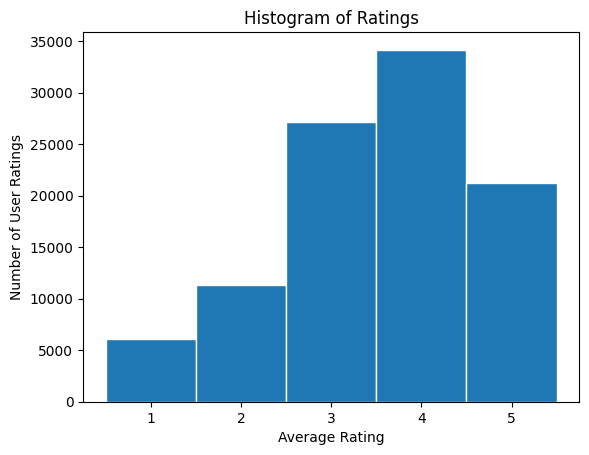

In [60]:
fig, ax = plt.subplots()
ax.hist(x=df['rating'], bins=range(1,7), align='left', edgecolor='white')
ax.set_title('Histogram of Ratings')
ax.set_xlabel('Average Rating')
ax.set_ylabel('Number of User Ratings')

count the number of ratings per user

In [83]:
nb_ratings_per_user = df.groupby(by='user id').count()['rating'].sort_values(ascending=False)
print("Users with the highest amount of ratings:" + str(nb_ratings_per_user.head()))
print("Users with the smallest amount of ratings:" + str(nb_ratings_per_user.tail()))

Users with the highest amount of ratings:user id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64
Users with the smallest amount of ratings:user id
685    20
475    20
36     20
732    20
596    20
Name: rating, dtype: int64


In [77]:
df[df['user id'] == 939].head()

,user id,item id,rating
67586,939,931,2
68430,939,106,3
69227,939,258,4
69319,939,1054,4
69946,939,689,5


In [78]:
nb_ratings_per_user.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

Text(0.5, 0, 'Number of Rating per user')

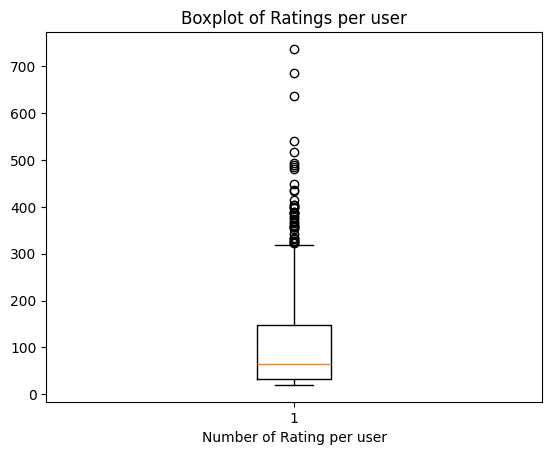

In [81]:
fig, ax = plt.subplots()
ax.boxplot(x=nb_ratings_per_user)
ax.set_title('Boxplot of Ratings per user')
ax.set_xlabel('Number of Rating per user')

In [84]:
nb_ratings_per_movie = df.groupby(by='item id').count()['rating'].sort_values(ascending=False)
print("Movies with the highest amount of ratings:" + str(nb_ratings_per_movie.head()))
print("Movies with the smallest amount of ratings:" + str(nb_ratings_per_movie.tail()))

Movies with the highest amount of ratings:item id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64
Movies with the smallest amount of ratings:item id
1576    1
1577    1
1348    1
1579    1
1682    1
Name: rating, dtype: int64


In [85]:
nb_ratings_per_movie.describe()

count    1682.000000
mean       59.453032
std        80.383846
min         1.000000
25%         6.000000
50%        27.000000
75%        80.000000
max       583.000000
Name: rating, dtype: float64

Text(0.5, 0, 'Number of Rating per movie')

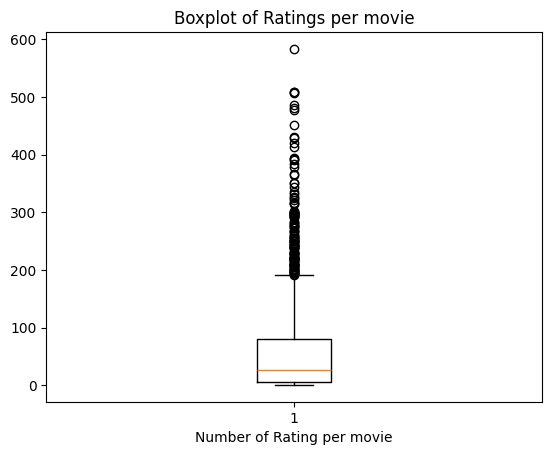

In [86]:
fig, ax = plt.subplots()
ax.boxplot(x=nb_ratings_per_movie)
ax.set_title('Boxplot of Ratings per movie')
ax.set_xlabel('Number of Rating per movie')

In [94]:
columns_names = ['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL',
           'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
           'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
           'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [98]:
df_movie = pd.read_csv('dataset/ml-100k/u.item', delimiter="|",  encoding='latin1', names=columns_names)

In [100]:
df_movie.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [104]:
df_movie.columns

Index(['movie id', 'movie title', 'release date', 'video release date',
       'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [107]:
df_with_movie = df.merge(right=df_movie, how='left', left_on="item id", right_on="movie id")

In [109]:
df_with_movie.head()

,user id,item id,rating,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,242,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,377,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,51,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,346,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [110]:
nb_ratings_per_movie = df_with_movie.groupby(by='movie title').count()['rating'].sort_values(ascending=False)
print("Movies with the highest amount of ratings:" + str(nb_ratings_per_movie.head()))
print("Movies with the smallest amount of ratings:" + str(nb_ratings_per_movie.tail()))

Movies with the highest amount of ratings:movie title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64
Movies with the smallest amount of ratings:movie title
Great Day in Harlem, A (1994)         1
Other Voices, Other Rooms (1997)      1
Good Morning (1971)                   1
Girls Town (1996)                     1
Á köldum klaka (Cold Fever) (1994)    1
Name: rating, dtype: int64


### Building a recommendation system using Collaborative filtering

We only have to use 3 columns for it

In [113]:
df_cut = df_with_movie[['user id', 'movie title', 'rating']]

In [114]:
df_cut.head()

,user id,movie title,rating
0,196,Kolya (1996),3
1,186,L.A. Confidential (1997),3
2,22,Heavyweights (1994),1
3,244,Legends of the Fall (1994),2
4,166,Jackie Brown (1997),1
